In [1]:
from plasma_classes import *
from plasma_utils import *
from matplotlib import pyplot as plt
from matplotlib import animation
from tqdm import tqdm

In [2]:
L = 1e-2
N_x = 200
N_p = 5000
h = L/N_x
tau = 2e-13

In [3]:
n0 = 1e17
n1 = n0*N_x/N_p
q = 1.60217e-19
m_e = 9.1093837e-31
m_i = 1.672e-27*131
epsilon = 8.85e-12

In [4]:
eV = 11600

In [5]:
E1_factor = 1.60218e-19

In [6]:
E1 = 18.3*E1_factor
alpha = 0.62

In [7]:
T_e = eV*20
T_i = 600
k_b = 1.38e-23
v_t_e = math.sqrt(3*k_b*T_e/m_e)
vmin_e = -3*v_t_e
vmax_e = 3*v_t_e
v_t_i = math.sqrt(3*k_b*T_i/m_i)
vmin_i = -3*v_t_i
vmax_i = 3*v_t_i

In [8]:
r_d = math.sqrt(epsilon * k_b * T_e / (q * q * n0));

In [9]:
r_d

0.00010506222052218572

In [10]:
h

5e-05

In [11]:
ions = Particles(N_p, n1, q, m_i)
electrons = Particles(N_p, n1, -q, m_e)
nodes = Nodes(N_x)

In [12]:
left_wall = Wall(0, L/10, 0, h, "left")
right_wall = Wall(9*L/10, L, 0, h, "right")

In [13]:
set_homogeneous(electrons, left_wall.right*h, right_wall.left*h)

In [14]:
set_homogeneous(ions, left_wall.right*h, right_wall.left*h)

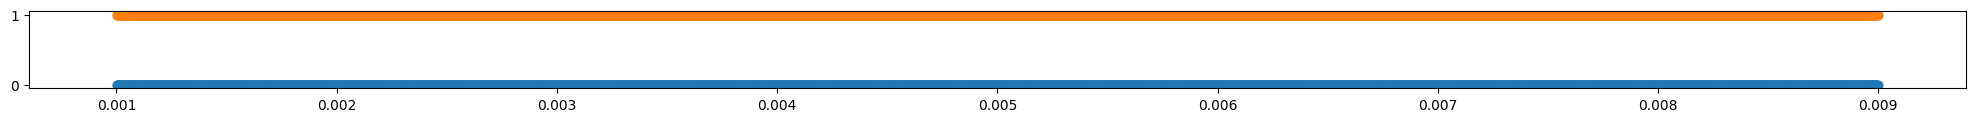

In [15]:
fig, ax = plt.subplots(1, 1)
ax.scatter(electrons.x, np.zeros(electrons.x.shape))
ax.scatter(ions.x, np.ones(ions.x.shape))
fig.set_size_inches((25, 1))


In [16]:
e_integral = get_integral(Maxwell(T_e, k_b, m_e), vmin_e, vmax_e, 100000)
i_integral = get_integral(Maxwell(T_i, k_b, m_i), vmin_i, vmax_i, 100000)

In [17]:
set_distr(electrons, e_integral)
set_distr(ions, i_integral)

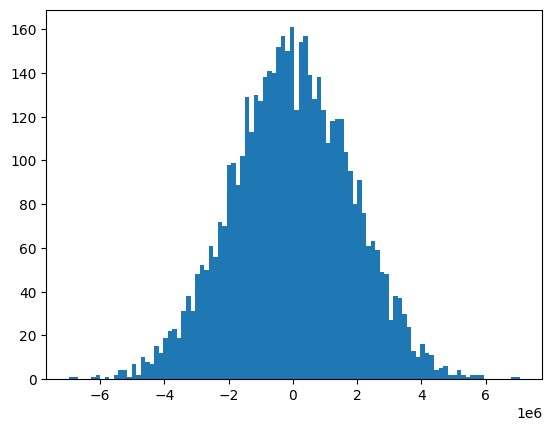

In [18]:
plt.hist(electrons.v, bins = 100)
%matplotlib inline

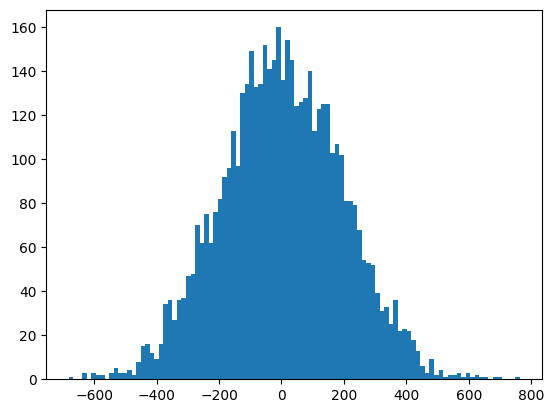

In [19]:
plt.hist(ions.v, bins = 100)
%matplotlib inline

In [20]:
electrons.normalise(h, tau)
ions.normalise(h, tau)

In [21]:
get_rho(nodes, electrons)
get_rho(nodes, ions)

In [22]:
calc_fields(nodes, h, epsilon)

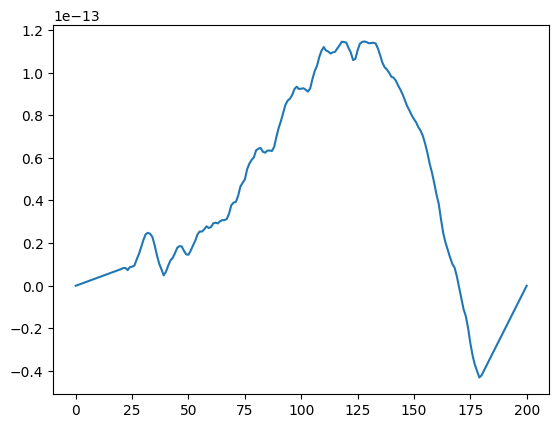

In [23]:
plt.plot(nodes.phi)

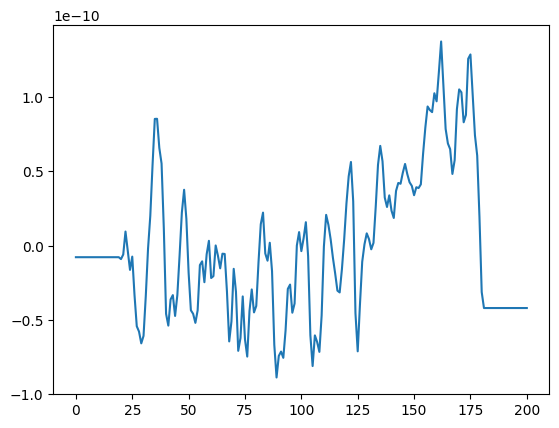

In [24]:
plt.plot(nodes.E)

In [25]:
accel(electrons, nodes, L, h, tau, zerostep=True)
accel(ions, nodes, L, h, tau, zerostep=True)

In [26]:
electron_distrs = []
ion_distrs = []

In [27]:
phi_over_time = []
E_over_time = []

In [28]:
n = 25000

In [29]:
walls = (left_wall, right_wall)

In [30]:
see_dict = {"E1": E1, "alpha": alpha, "h": h, "tau": tau}

In [31]:
energy_dict = {"electric": [], "kinetic": [], "summ": [], "h": h, "tau": tau, "nodes": nodes}

In [ ]:
injection = {"neutral_range": 50, "e_integral": e_integral, "i_integral": i_integral, "nodes": nodes}

In [ ]:
maxwellise = False

In [32]:
neutral_range = 50

In [34]:
for t in tqdm(range(n)):
    try:
        move(electrons, nodes, consistency=True)
        move(ions, nodes, consistency=True)
    except Exception:
        print("number of iteration: ", t)
        break

    nodes.rho *= 0
    account_walls(electrons, walls, SEE=see_dict, Energy=energy_dict, nodes=nodes)
    account_walls(ions, walls, Energy=energy_dict, nodes=nodes, neutral_range=neutral_range)
    get_rho(nodes, electrons)
    get_rho(nodes, ions)
    for wall in walls:
        for particles in wall.particles_lst:
            get_rho(nodes, particles)
    
    calc_fields(nodes, h, epsilon)
    phi_over_time.append(nodes.phi.copy())
    E_over_time.append(nodes.E.copy())
    accel(electrons, nodes, L, h, tau)
    accel(ions, nodes,  L, h, tau)
    
    electrons.denormalise(h, tau)
    ions.denormalise(h, tau)
    electron_distrs.append(electrons.v.copy())
    ion_distrs.append(ions.v.copy())
    electrons.normalise(h, tau)
    ions.normalise(h, tau)

    if maxwellise:
        set_distr(electrons, e_integral, neutral_range=neutral_range, nodes=nodes)
        set_distr(ions, i_integral, neutral_range=neutral_range, nodes=nodes)
    

  0%|          | 14/25000 [00:00<06:34, 63.27it/s]

emitted: 
[21. 21. 21.]
[0.00152158 0.00496931 0.01640462]
emitted: 
[21. 21.]
[0.00623509 0.00738238]


  0%|          | 42/25000 [00:00<06:32, 63.65it/s]

emitted: 
[179. 179.]
[-0.00245058 -0.00252208]
emitted: 
[179. 179.]
[-0.00470054 -0.0045637 ]
emitted: 
[179. 179.]
[-0.00935212 -0.00102822]


  0%|          | 56/25000 [00:00<06:34, 63.19it/s]

emitted: 
[179. 179.]
[-0.00285166 -0.01006036]


  0%|          | 70/25000 [00:01<06:33, 63.36it/s]

emitted: 
[21. 21. 21.]
[0.00912448 0.0133636  0.00400168]
emitted: 
[179. 179. 179.]
[-0.01107449 -0.00559374 -0.00780507]


  0%|          | 98/25000 [00:01<06:31, 63.68it/s]

emitted: 
[21. 21.]
[0.00862989 0.00938517]


  0%|          | 112/25000 [00:01<06:42, 61.79it/s]

emitted: 
[21.]
[0.01556576]
emitted: 
[21. 21.]
[0.00037417 0.00137335]
emitted: 
[179. 179.]
[-0.0100719  -0.00316886]


  1%|          | 140/25000 [00:02<06:37, 62.51it/s]

emitted: 
[21.]
[0.00464058]
emitted: 
[21. 21.]
[0.0014337  0.00492135]
emitted: 
[179.]
[-0.0101101]


  1%|          | 210/25000 [00:03<06:34, 62.83it/s]

emitted: 
[21. 21. 21.]
[0.00691355 0.00115859 0.01812918]


  1%|          | 224/25000 [00:03<06:37, 62.38it/s]

emitted: 
[21.]
[0.00425051]
emitted: 
[21. 21.]
[0.01298227 0.007502  ]
emitted: 
[179. 179.]
[-0.01109337 -0.00813967]
emitted: 
[21.]
[0.00811239]


  1%|          | 245/25000 [00:03<06:44, 61.24it/s]

emitted: 
[179. 179.]
[-0.00790066 -0.01022216]


  1%|          | 301/25000 [00:04<06:32, 62.86it/s]

emitted: 
[21. 21.]
[0.00106687 0.00935732]
emitted: 
[21. 21.]
[0.00194275 0.01640712]
emitted: 
[179. 179.]
[-0.0020487  -0.00170641]


  1%|▏         | 315/25000 [00:05<06:54, 59.52it/s]

emitted: 
[179. 179. 179.]
[-0.01085724 -0.0159512  -0.00130733]
emitted: 
[21. 21.]
[0.00774389 0.00578912]


  1%|▏         | 329/25000 [00:05<06:48, 60.41it/s]

emitted: 
[21.]
[0.00291859]
emitted: 
[179. 179. 179.]
[-0.01922485 -0.00496459 -0.01554525]
emitted: 
[21. 21.]
[0.00623646 0.00780635]


  1%|▏         | 350/25000 [00:05<06:38, 61.92it/s]

emitted: 
[21.]
[0.01178173]


  1%|▏         | 371/25000 [00:05<07:02, 58.36it/s]

emitted: 
[21. 21.]
[0.0137325 0.0126236]


  2%|▏         | 385/25000 [00:06<06:46, 60.61it/s]

emitted: 
[21. 21.]
[0.00207999 0.00150894]
emitted: 
[179.]
[-0.01210705]


  2%|▏         | 399/25000 [00:06<06:38, 61.73it/s]

emitted: 
[179. 179. 179.]
[-0.00568027 -0.00487104 -0.01024943]


  2%|▏         | 462/25000 [00:07<06:33, 62.40it/s]

emitted: 
[179. 179.]
[-0.00867264 -0.00648554]
emitted: 
[21. 21.]
[0.00774519 0.00650539]


  2%|▏         | 497/25000 [00:08<06:45, 60.47it/s]

emitted: 
[179.]
[-0.00362413]


  2%|▏         | 504/25000 [00:08<06:42, 60.81it/s]

emitted: 
[179.]
[-0.01424251]


  2%|▏         | 609/25000 [00:09<06:23, 63.68it/s]

emitted: 
[179. 179.]
[-0.00059407 -0.00214932]


  3%|▎         | 651/25000 [00:10<06:37, 61.30it/s]

emitted: 
[179. 179. 179. 179.]
[-0.00320041 -0.00575258 -0.0214513  -0.00710984]


  3%|▎         | 707/25000 [00:11<06:33, 61.79it/s]

emitted: 
[21.]
[0.01003914]


  3%|▎         | 756/25000 [00:12<06:38, 60.79it/s]

emitted: 
[179. 179.]
[-0.00071206 -0.00654458]


  3%|▎         | 791/25000 [00:12<06:32, 61.64it/s]

emitted: 
[21.]
[0.01038921]


  3%|▎         | 826/25000 [00:13<06:28, 62.26it/s]

emitted: 
[21.]
[0.00069957]


  4%|▎         | 886/25000 [00:14<06:49, 58.91it/s]

emitted: 
[21. 21. 21.]
[0.0180861  0.00056185 0.01634941]


  4%|▍         | 938/25000 [00:15<06:47, 59.03it/s]

emitted: 
[21. 21.]
[0.00768268 0.00818766]


  4%|▍         | 950/25000 [00:15<07:04, 56.72it/s]

emitted: 
[179. 179.]
[-0.00128299 -0.0023555 ]
emitted: 
[21.]
[0.0073419]


  4%|▍         | 975/25000 [00:15<06:44, 59.33it/s]

emitted: 
[21. 21.]
[0.01941537 0.00701468]


  4%|▍         | 1054/25000 [00:17<06:42, 59.56it/s]

emitted: 
[21. 21.]
[0.00591181 0.00948273]


  4%|▍         | 1115/25000 [00:18<06:47, 58.67it/s]

emitted: 
[179. 179.]
[-0.00308427 -0.00091459]


  5%|▌         | 1278/25000 [00:20<06:41, 59.11it/s]

emitted: 
[21. 21.]
[0.01349137 0.00099713]


  5%|▌         | 1292/25000 [00:21<06:36, 59.83it/s]

emitted: 
[179. 179.]
[-0.00455512 -0.00028612]


  6%|▋         | 1578/25000 [00:25<06:36, 59.05it/s]

emitted: 
[179. 179.]
[-0.00356402 -0.0056524 ]
emitted: 
[21. 21.]
[0.0203614  0.02011958]


  6%|▋         | 1602/25000 [00:26<06:37, 58.93it/s]

emitted: 
[179.]
[-0.01136188]


  7%|▋         | 1692/25000 [00:27<06:28, 60.00it/s]

emitted: 
[179.]
[-0.00278518]
emitted: 
[179. 179.]
[-0.01634818 -0.00916539]


  7%|▋         | 1729/25000 [00:28<06:39, 58.20it/s]

emitted: 
[21. 21.]
[0.00412544 0.01252155]


  7%|▋         | 1796/25000 [00:29<06:33, 58.97it/s]

emitted: 
[21. 21.]
[0.0097865  0.00390314]


  7%|▋         | 1867/25000 [00:30<06:26, 59.78it/s]

emitted: 
[21.]
[0.00161724]


  8%|▊         | 1892/25000 [00:31<06:34, 58.64it/s]

emitted: 
[179. 179.]
[-0.0099761  -0.00013362]


  8%|▊         | 1905/25000 [00:31<06:30, 59.17it/s]

emitted: 
[179. 179.]
[-0.00446809 -0.00801708]
emitted: 
[21.]
[0.00352737]


  8%|▊         | 1929/25000 [00:32<06:43, 57.11it/s]

emitted: 
[179. 179.]
[-0.00288279 -0.00776689]


  8%|▊         | 2102/25000 [00:34<06:32, 58.39it/s]

emitted: 
[179. 179.]
[-0.00228076 -0.01023653]


  8%|▊         | 2114/25000 [00:35<06:42, 56.86it/s]

emitted: 
[179. 179.]
[-0.00444815 -0.0025521 ]


  9%|▉         | 2240/25000 [00:37<06:35, 57.53it/s]

emitted: 
[179. 179.]
[-0.00273243 -0.00033063]


 10%|▉         | 2384/25000 [00:39<06:35, 57.14it/s]

emitted: 
[21. 21.]
[0.00352323 0.00228603]


 10%|▉         | 2420/25000 [00:40<06:29, 58.04it/s]

emitted: 
[21. 21.]
[0.00694816 0.00747991]


 10%|█         | 2615/25000 [00:43<06:40, 55.95it/s]

emitted: 
[179. 179.]
[-0.00179304 -0.01102663]


 11%|█         | 2634/25000 [00:44<06:15, 59.52it/s]


KeyboardInterrupt: 

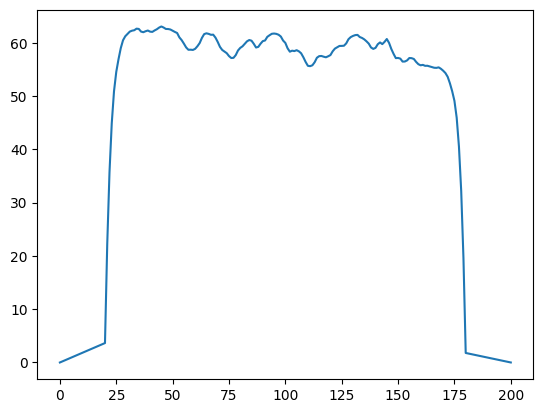

In [69]:
plt.plot(phi_over_time[-1])

In [70]:
electrons.n_macro

19073

In [71]:
ions.n_macro

20000

MovieWriter imagemagick unavailable; using Pillow instead.


list index out of range
done!


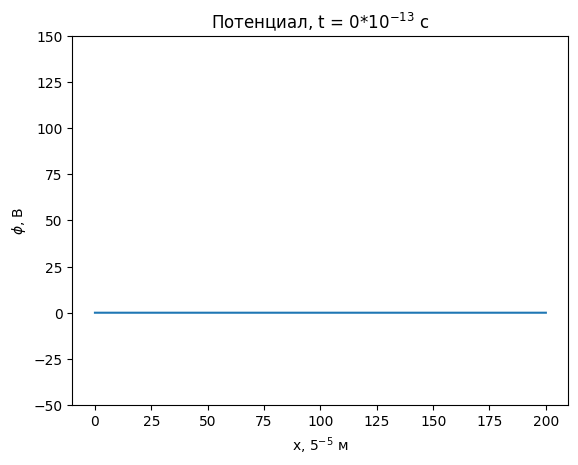

In [74]:
try:
    fig, ax = plt.subplots()

    #  Создаем функцию, генерирующую картинки
    #  для последующей "склейки":
    def animate(i):
        ax.clear()
        line = ax.plot(phi_over_time[i*50])
        ax.set_title("Потенциал, t = " + str(i*50)+ r"$*10^{-13}$ c")
        #ax.axvline(x=left_wall.right, color='k', linestyle='--', linewidth=1)
        #ax.set_xlim(left_wall.right, right_wall.left)
        ax.set_ylim(-50, 150)
        ax.set_ylabel(r"$\phi$, В")
        ax.set_xlabel(r"x, $5^{-5}$ м")
        return line

    #  Создаем объект анимации:
    sin_animation = animation.FuncAnimation(fig, 
                                        animate, 
                                        frames=range(n),
                                        interval = 5,
                                        repeat = False)

    #  Сохраняем анимацию в виде gif файла:
    sin_animation.save('results/SEE_phi_over_time.gif',
                    writer='imagemagick', 
                    fps=30)
except Exception as e:
    print(e)
    print("done!")

MovieWriter imagemagick unavailable; using Pillow instead.


list index out of range
done!


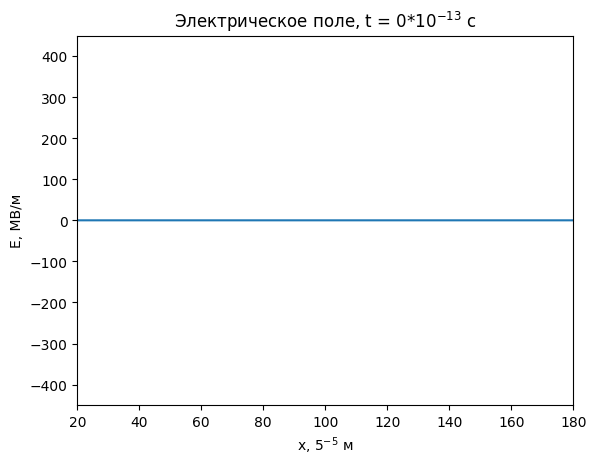

In [379]:
try:
    fig, ax = plt.subplots()

    #  Создаем функцию, генерирующую картинки
    #  для последующей "склейки":
    def animate(i):
        ax.clear()
        line = ax.plot(E_over_time[i*50]/1000)
        ax.set_title("Электрическое поле, t = " + str(2*i*50)+ r"$*10^{-13}$ c")
        ax.set_xlim(left_wall.right, right_wall.left)
        ax.set_ylim(-450, 450)
        ax.set_ylabel(r"E, МВ/м")
        ax.set_xlabel(r"x, $5^{-5}$ м")
        return line

    #  Создаем объект анимации:
    sin_animation = animation.FuncAnimation(fig, 
                                        animate, 
                                        frames=range(n),
                                        interval = 5,
                                        repeat = False)

    #  Сохраняем анимацию в виде gif файла:
    sin_animation.save('results/SEE_E_over_time.gif',
                    writer='imagemagick', 
                    fps=30)
except Exception as e:
    print(e)
    print("done!")

MovieWriter imagemagick unavailable; using Pillow instead.


list index out of range
done!


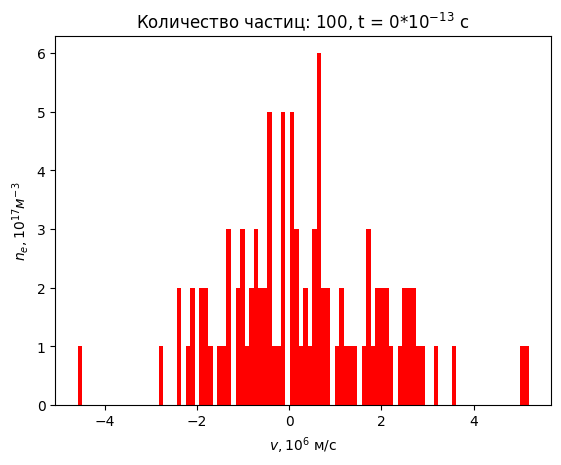

In [37]:
try:
    fig, ax = plt.subplots()

    #  Создаем функцию, генерирующую картинки
    #  для последующей "склейки":
    def animate(i):
        ax.clear()
        # Calculate the bin width based on the data
        data_min = min(np.min(electron_distrs[i*50]/1e6), np.min(ion_distrs[0]/1000))
        data_max = max(np.max(electron_distrs[i*50]/1e6), np.max(ion_distrs[0]/1000))
        bin_width = 2*(np.percentile(electron_distrs[i*50]/1e6, 75) - np.percentile(electron_distrs[i*50]/1e6, 25))/len(electron_distrs[i*50])**(1/3)
        bins = np.arange(data_min, data_max + bin_width, bin_width)

        line = ax.hist(electron_distrs[0]/1e6, bins=100, color="b")
        ax.hist(electron_distrs[i*50]/1e6, bins=100, color = "r")
        ax.set_title("Количество частиц: " + str(len(electron_distrs[i*50])) + 
                     ", t = " + str(2*i*50)+ r"$*10^{-13}$ c")
        ax.set_ylabel(r"$n_e, 10^{17} м^{-3}$")
        ax.set_xlabel(r"$v, 10^{6}$ м/c")
        return line

    #  Создаем объект анимации:
    sin_animation = animation.FuncAnimation(fig, 
                                        animate, 
                                        frames=range(n),
                                        interval = 5,
                                        repeat = False)

    #  Сохраняем анимацию в виде gif файла:
    sin_animation.save('results/SEE_electron_distrs_over_time.gif',
                    writer='imagemagick', 
                    fps=30)
except Exception as e:
    print(e)
    print("done!")

MovieWriter imagemagick unavailable; using Pillow instead.


list index out of range
done!


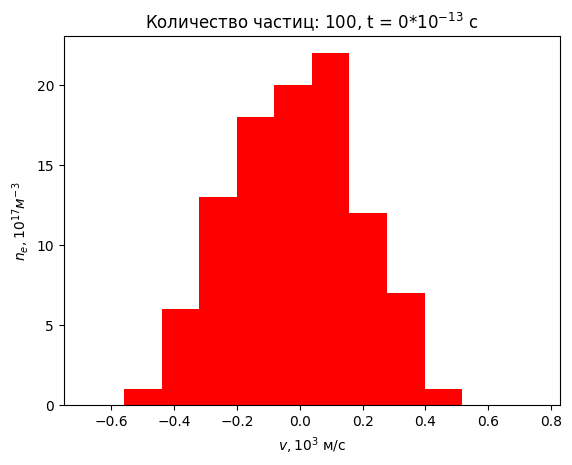

In [38]:
try:
    fig, ax = plt.subplots()

    #  Создаем функцию, генерирующую картинки
    #  для последующей "склейки":
    def animate(i):
        ax.clear()
        # Calculate the bin width based on the data
        data_min = min(np.min(ion_distrs[i*50]/1000), np.min(ion_distrs[0]/1000))
        data_max = max(np.max(ion_distrs[i*50]/1000), np.max(ion_distrs[0]/1000))
        bin_width = 2*(np.percentile(ion_distrs[i*50]/1000, 75) - np.percentile(ion_distrs[i*50]/1000, 25))/len(ion_distrs[i*50])**(1/3)
        bins = np.arange(data_min, data_max + bin_width, bin_width)
        
        line = ax.hist(ion_distrs[0]/1000, bins=bins, color="b")
        ax.hist(ion_distrs[i*50]/1000, bins=bins, color="r")
        
        ax.set_title("Количество частиц: " + str(len(ion_distrs[i*50])) + 
                     ", t = " + str(2*i*50)+ r"$*10^{-13}$ c")
        ax.set_ylabel(r"$n_e, 10^{17} м^{-3}$")
        ax.set_xlabel(r"$v, 10^{3}$ м/c")
        return line

    #  Создаем объект анимации:
    sin_animation = animation.FuncAnimation(fig, 
                                        animate, 
                                        frames=range(n),
                                        interval = 5,
                                        repeat = False)

    #  Сохраняем анимацию в виде gif файла:
    sin_animation.save('results/SEE_ion_distrs_over_time.gif',
                    writer='imagemagick', 
                    fps=30)
except Exception as e:
    print(e)
    print("done!")

In [112]:
import os
import imageio

gif_dir = 'results/'
paired_gif_dir = 'paired_gifs/'

SEE_gif_files = [filename for filename in os.listdir(gif_dir) if filename.startswith('SEE') and filename.endswith('.gif')]
reg_gif_files = [filename for filename in os.listdir(gif_dir) if not filename.startswith('SEE') and filename.endswith('.gif')]

for SEE_gif_file in SEE_gif_files:
    SEE_gif_path = os.path.join(gif_dir, SEE_gif_file)
    reg_gif_file = SEE_gif_file.replace('SEE', '').lstrip('_')
    reg_gif_path = os.path.join(gif_dir, reg_gif_file)
    if os.path.exists(reg_gif_path):
        SEE_gif = imageio.mimread(SEE_gif_path, memtest=False)
        reg_gif = imageio.mimread(reg_gif_path, memtest=False)
        paired_gifs = [np.concatenate((reg_frame, SEE_frame), axis=1) for reg_frame, SEE_frame in zip(reg_gif, SEE_gif)]
        paired_gif_path = os.path.join(paired_gif_dir, SEE_gif_file.replace('SEE', 'paired'))
        imageio.mimwrite(paired_gif_path, paired_gifs, format='gif', fps=30)


In [37]:
import os
import imageio
import numpy as np
import matplotlib.pyplot as plt

# Set directory paths
reg_gif_dir = 'path/to/regular/gifs'
SEE_gif_dir = 'path/to/SEE/gifs'
paired_gif_dir = 'path/to/paired/gifs'

# Loop through SEE gifs
for SEE_gif_file in os.listdir(SEE_gif_dir):
    if SEE_gif_file.startswith('SEE'):
        # Load regular gif
        reg_gif_file = SEE_gif_file.replace('SEE', '')
        reg_gif_path = os.path.join(reg_gif_dir, reg_gif_file)
        reg_gif = imageio.mimread(reg_gif_path)

        # Load SEE gif
        SEE_gif_path = os.path.join(SEE_gif_dir, SEE_gif_file)
        SEE_gif = imageio.mimread(SEE_gif_path)

        # Combine frames
        paired_gifs = [np.concatenate((reg_frame, SEE_frame), axis=1) for reg_frame, SEE_frame in zip(reg_gif, SEE_gif)]

        # Add title to each frame
        for i, frame in enumerate(paired_gifs):
            fig, ax = plt.subplots()
            ax.imshow(frame, cmap='gray')
            if i == 0:
                ax.set_title('Regular GIF                          SEE GIF')
            plt.axis('off')

            # Save frame
            paired_gif_path = os.path.join(paired_gif_dir, SEE_gif_file.replace('SEE', 'paired'))
            imageio.imwrite(paired_gif_path, frame)

        # Combine frames into GIF
        paired_gif_path = os.path.join(paired_gif_dir, SEE_gif_file.replace('SEE', 'paired'))
        with imageio.get_writer(paired_gif_path, mode='I', fps=30) as writer:
            for frame in paired_gifs:
                writer.append_data(frame)


FileNotFoundError: [WinError 3] Системе не удается найти указанный путь: 'path/to/SEE/gifs'

In [39]:
ions_over_time = np.array([len(x) for x in ion_distrs])

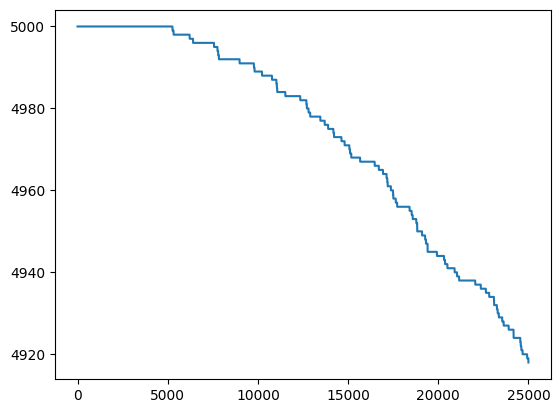

In [40]:
plt.plot(ions_over_time)

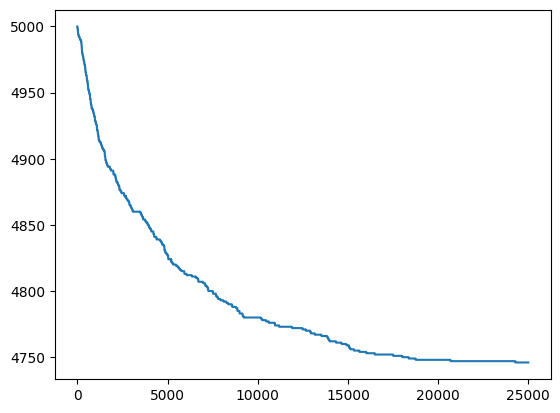

In [41]:
electrons_over_time = np.array([len(x) for x in electron_distrs])
plt.plot(electrons_over_time)


(array([2.50911614e-07, 4.18186024e-07, 1.67274409e-07, 3.34548819e-07,
        3.34548819e-07, 4.18186024e-07, 5.01823228e-07, 2.50911614e-07,
        2.50911614e-07, 4.18186024e-07, 6.69097638e-07, 5.85460433e-07,
        3.34548819e-07, 8.36372047e-07, 5.01823228e-07, 4.18186024e-07,
        9.20009252e-07, 8.36372047e-07, 9.20009252e-07, 1.42183248e-06,
        1.00364646e-06, 2.09093012e-06, 1.14582970e-05, 6.73279498e-05,
        1.47786941e-04, 1.19099380e-04, 3.40403423e-05, 5.01823228e-06,
        1.58910689e-06, 7.52734843e-07, 1.33819528e-06, 1.17092087e-06,
        6.69097638e-07, 5.01823228e-07, 7.52734843e-07, 4.18186024e-07,
        5.85460433e-07, 5.01823228e-07, 4.18186024e-07, 5.01823228e-07,
        4.18186024e-07, 4.18186024e-07, 4.18186024e-07, 5.01823228e-07,
        5.01823228e-07, 1.67274409e-07, 3.34548819e-07, 4.18186024e-07,
        8.36372047e-08, 2.50911614e-07]),
 array([-60222.11855083, -57790.96737177, -55359.81619272, -52928.66501366,
        -50497.513

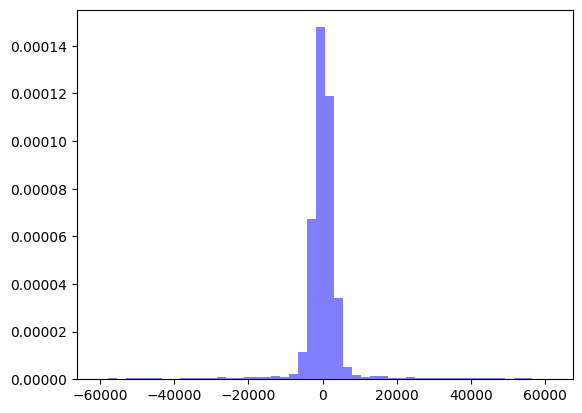

In [44]:
plt.hist(ion_distrs[-1], bins=50, density=True, facecolor='blue', alpha=0.5)

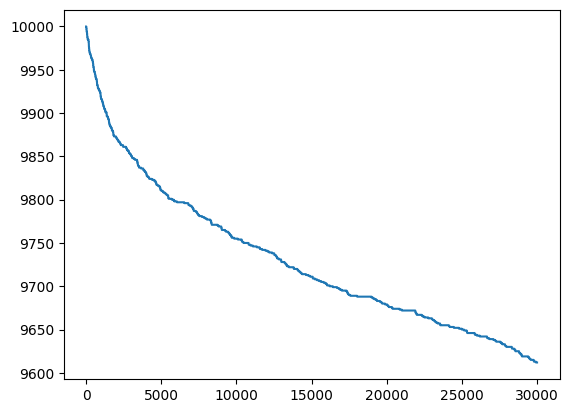

In [39]:
plt.plot(electrons_over_time+ions_over_time)
